This workbook is purely for storing the codes on image loading and its feature extraction. 

In [1]:
# load raw images

from zipfile import ZipFile

# indicate zipfile location to extract all images
 
with ZipFile("/content/drive/MyDrive/farfetch_images.zip", "r") as zip:  
    zip.extractall()

In [2]:
# load data from CSV

import pandas as pd
import numpy as np

train_df = pd.read_csv("/content/drive/MyDrive/train_df.csv")
test_df = pd.read_csv("/content/drive/MyDrive/test_df.csv")
valid_df = pd.read_csv("/content/drive/MyDrive/valid_df.csv")

In [ ]:
# load data to numpy arrays

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

target_variables = train_df.label.unique()
print("Labels", target_variables)

images_tr = train_df["images.cutOut"].to_numpy()
labels_tr = train_df["label"].to_numpy()
labels_tr_enc = le.fit_transform(train_df.label.values)
print("Train - images", images_tr.shape)
print("Train - labels", labels_tr.shape)

images_te = test_df["images.cutOut"].to_numpy()
labels_te = test_df["label"].to_numpy()
labels_te_enc = le.fit_transform(test_df.label.values)
print("Test - images", images_te.shape)
print("Test - labels", labels_te.shape)

images_val = valid_df["images.cutOut"].to_numpy()
labels_val = valid_df["label"].to_numpy()
labels_val_enc = le.fit_transform(valid_df.label.values)
print("Valid - images", images_val.shape)
print("Valid - labels", labels_val.shape)

Labels ['dress' 'sneakers' 'pants' 'jacket' 'bag' 'boots' 'glasses']
Train - images (4200,)
Train - labels (4200,)
Test - images (1050,)
Test - labels (1050,)
Valid - images (1750,)
Valid - labels (1750,)


- Download images from URL's to local machine

In [ ]:
class_labels = train_df.label.unique()

In [ ]:
# define class labels

class_labels = train_df.label.unique()

import os
# create output folders

folders = ["train", "test", "valid"]
class_labels = train_df.label.unique()

for folder in folders: 
  for label in class_labels:
    newpath = os.path.join('images', folder, label)
    if not os.path.exists(newpath):
      os.makedirs(newpath)

In [ ]:
# train set image loading

from pandas.core.common import temp_setattr

extension = '.jpg'
r = images_tr.shape[0] 

#for folder in folders: 
for i in range(r):
  url = images_tr[i]
  var = labels_tr[i]
  image_name = str(var) + extension
  fullfilename = os.path.join('images', 'train',  var, var + str(i) + extension)
  urllib.request.urlretrieve(url, fullfilename)

In [ ]:
# valiation set image loading

from pandas.core.common import temp_setattr

extension = '.jpg'
r = images_val.shape[0] 

#for folder in folders: 
for i in range(r):
  url = images_val[i]
  var = labels_val[i]
  image_name = str(var) + extension
  fullfilename = os.path.join('images', 'valid',  var, var + str(i) + extension)
  urllib.request.urlretrieve(url, fullfilename)

In [ ]:
# test set image loading

from pandas.core.common import temp_setattr

extension = '.jpg'
r = images_te.shape[0] 

#for folder in folders: 
for i in range(r):
  url = images_te[i]
  var = labels_te[i]
  image_name = str(var) + extension
  fullfilename = os.path.join('images', 'test',  var, var + str(i) + extension)
  urllib.request.urlretrieve(url, fullfilename)

      #counter = 1
      #while os.path.exists(fullfilename):
        #fullfilename = os.path.join('images', folder, var, var +  str(counter) + extension)
       # counter += 1
#urllib.request.urlretrieve(url, fullfilename)

- Extract files to zip file

In [ ]:
import zipfile
import sys


# define function to save all extracted images to zipfile

def zipfolder(foldername, target_dir):            
    zipobj = zipfile.ZipFile(foldername + '.zip', 'w', zipfile.ZIP_DEFLATED)
    rootlen = len(target_dir) +1
    for base, dirs, files in os.walk(target_dir):
        for file in files:
            fn = os.path.join(base, file)
            zipobj.write(fn, fn[rootlen:])

In [ ]:
# run function

zipfolder('farfetch_images', 'images') #insert your variables here
#sys.exit()

- Convert images to array and extract features using ImageDataGenerator

In [3]:
# load raw images

from zipfile import ZipFile
import os

# indicate zipfile location to extract all images

#with ZipFile("/content/drive/MyDrive/farfetch_images.zip", "r") as zip:  
 #   zip.extractall()

path = "/content/drive/MyDrive/"
 
with ZipFile( path +"test.zip", "r") as zip:  
    zip.extractall()

with ZipFile( path +"valid.zip", "r") as zip:  
    zip.extractall()    

with ZipFile(path +"train-1.zip", "r") as zip:  
    zip.extractall()

with ZipFile(path +"train.zip", "r") as zip:  
    zip.extractall()

# run this line if the train comes as 'train-2'
if not os.path.exists(r"train"):
    os.rename("train-2","train")


# Merge train-1 and train

import subprocess as sbp
import os
import shutil

path= 'train-1'
fol = os.listdir(path)
p2 = 'train'

for i in fol:
    p1 = os.path.join(path,i)
    p3 = 'cp -r ' + p1 +' ' + p2+'/.'
    sbp.Popen(p3,shell=True)


#remove train-1 folder
shutil.rmtree('train-1')
#shutil.rmtree('train-2')

# create Image folder
#newpath = r'images' 
#if not os.path.exists(newpath):
 #   os.makedirs(newpath)



In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_generator = ImageDataGenerator(rescale=1/255, horizontal_flip=True,rotation_range=5)
test_generator = ImageDataGenerator(rescale=1./255)

In [5]:
import os

trainset=img_generator.flow_from_directory(os.path.join("train"),batch_size=100 ,target_size=(224, 224),shuffle=True, class_mode='sparse')
validset=img_generator.flow_from_directory(os.path.join("valid"),batch_size=100 ,target_size=(224, 224),  shuffle=True, class_mode='sparse')
testset=test_generator.flow_from_directory(os.path.join("test"),batch_size=100 ,target_size=(224, 224), shuffle=True, class_mode='sparse')

Found 4200 images belonging to 7 classes.
Found 1750 images belonging to 7 classes.
Found 1050 images belonging to 7 classes.


In [6]:
import numpy as np

batch_imgs_tr,batch_labels_tr =trainset.next()
print("Batch images train:",batch_imgs_tr.shape)
print("Batch labels train:",batch_labels_tr.shape)

batch_imgs_te,batch_labels_te =testset.next()
print("Batch images test:",batch_imgs_te.shape)
print("Batch labels test:",batch_labels_te.shape)

batch_imgs_val,batch_labels_val =validset.next()
print("Batch images validation:",batch_imgs_val.shape)
print("Batch labels validation:",batch_labels_val.shape)


#save train batch and labels
np.save("batch_imgs_tr", batch_imgs_tr)
np.save("batch_labels_tr", batch_labels_tr)

#save validation batch and labels
np.save("batch_imgs_te", batch_imgs_te)
np.save("batch_labels_te", batch_labels_te)

#save test batch and labels
np.save("batch_imgs_val", batch_imgs_val)
np.save("batch_labels_val", batch_labels_val)

Batch images train: (100, 224, 224, 3)
Batch labels train: (100,)
Batch images test: (100, 224, 224, 3)
Batch labels test: (100,)
Batch images validation: (100, 224, 224, 3)
Batch labels validation: (100,)


- High-level feature extraction using MobileNetv2

In [8]:
import tensorflow as tf
import tensorflow_hub as hub

# Create the image feature extractor
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

# Two options:
# 1
#feature_extractor = hub.load(model_url)
# 2
feature_extractor = hub.KerasLayer(model_url, input_shape=(224, 224, 3), trainable=False)

In [9]:
# Extract features for trained data 
features =feature_extractor(batch_imgs_tr) 
print(features.shape)

labels=batch_labels_tr
print(labels.shape)

class_labels = ['bag','boots','dress','glasses','jacket','pants','sneakers']
print(class_labels)


# Create input matrix
X_tr = np.array(features)
y_tr = np.array(labels)
names = np.array(class_labels)

# Save them into a .npz file
np.savez('train_data.npz', data=X_tr, labels=y_tr, names=names)

(100, 1280)
(100,)
['bag', 'boots', 'dress', 'glasses', 'jacket', 'pants', 'sneakers']


In [10]:
# Extract features for trained data 
features =feature_extractor(batch_imgs_te) 
print(features.shape)

labels=batch_labels_te
print(labels.shape)

print(class_labels)


# Create input matrix
X_te = np.array(features)
y_te = np.array(labels)
names = np.array(class_labels)

# Save them into a .npz file
np.savez('test_data.npz', data=X_te, labels=y_te, names=names)

(100, 1280)
(100,)
['bag', 'boots', 'dress', 'glasses', 'jacket', 'pants', 'sneakers']


In [11]:
# Extract features for trained data 
features =feature_extractor(batch_imgs_val) 
print(features.shape)

labels=batch_labels_val
print(labels.shape)

print(class_labels)


# Create input matrix
X_val = np.array(features)
y_val = np.array(labels)
names = np.array(class_labels)

# Save them into a .npz file
np.savez('valid_data.npz', data=X_val, labels=y_val, names=names)

(100, 1280)
(100,)
['bag', 'boots', 'dress', 'glasses', 'jacket', 'pants', 'sneakers']


In [18]:
y_tr

array([2., 2., 1., 1., 1., 4., 1., 1., 1., 1., 6., 0., 4., 3., 1., 5., 4.,
       6., 4., 5., 3., 4., 6., 4., 6., 2., 6., 5., 5., 6., 3., 5., 5., 5.,
       3., 2., 4., 3., 4., 5., 2., 6., 6., 4., 6., 6., 2., 4., 6., 3., 2.,
       0., 2., 4., 6., 3., 3., 0., 4., 0., 5., 2., 2., 3., 0., 2., 6., 0.,
       0., 3., 5., 6., 3., 5., 1., 1., 2., 1., 6., 3., 2., 0., 3., 6., 2.,
       2., 4., 3., 3., 6., 5., 6., 3., 1., 1., 3., 6., 6., 3., 1.],
      dtype=float32)

Basic EDA on high-level feature

In [19]:
# array labels for each class

result0 = np.where(y_tr == 0)
bag = X_tr[result0]
print("bag",bag.shape)

result1 = np.where(y_tr == 1)
boots = X_tr[result1]
print("boots",boots.shape)

result2 = np.where(y_tr == 2)
dress = X_tr[result2]
print("dress",dress.shape)

result3 = np.where(y_tr == 3)
glasses = X_tr[result3]
print("glasses",glasses.shape)

result4 = np.where(y_tr == 4)
jacket = X_tr[result4]
print("jacket",jacket.shape)

result5 = np.where(y_tr == 5)
pants = X_tr[result5]
print("pants",pants.shape)

result6 = np.where(y_tr == 6)
sneakers = X_tr[result6]
print("sneakers",sneakers.shape)

bag (8, 1280)
boots (14, 1280)
dress (15, 1280)
glasses (18, 1280)
jacket (13, 1280)
pants (12, 1280)
sneakers (20, 1280)


In [20]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns

Text(0.5, 1.0, 'sneakers')

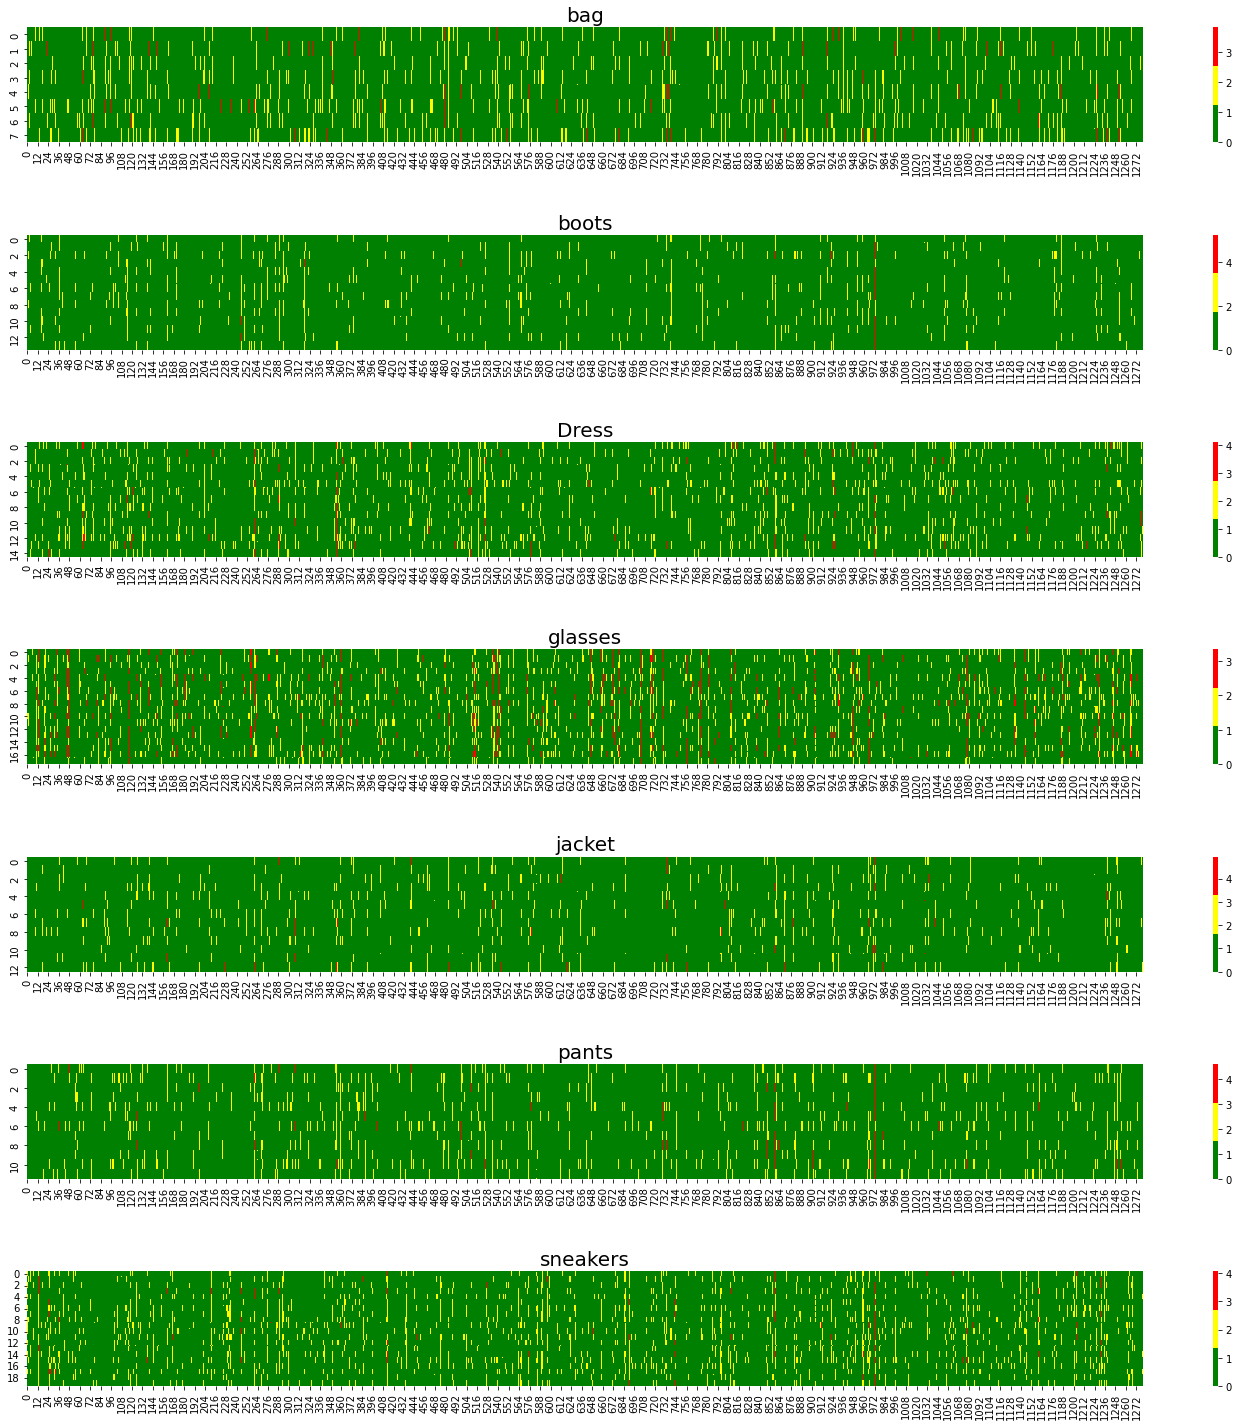

In [21]:
# define plots, sizes and axes
fig = plt.figure(figsize=(25,25)) # width x height
ax1 = fig.add_subplot(7, 1, 1) # row, column, position
ax2 = fig.add_subplot(7, 1, 2)
ax3 = fig.add_subplot(7, 1, 3)
ax4 = fig.add_subplot(7, 1, 4)
ax5 = fig.add_subplot(7, 1, 5)
ax6 = fig.add_subplot(7, 1, 6)
ax7 = fig.add_subplot(7, 1, 7)
plt.subplots_adjust(hspace = 0.8)

#plot the data
sns.heatmap(data=bag, ax=ax1,cmap=ListedColormap(['green', 'yellow', 'red'])) # limit colors for clarity
ax1.set_title( "bag" , size = 20)

sns.heatmap(data=boots, ax=ax2,cmap=ListedColormap(['green', 'yellow', 'red']))
ax2.set_title( "boots" , size = 20)

sns.heatmap(data=dress, ax=ax3,cmap=ListedColormap(['green', 'yellow', 'red']))
ax3.set_title( "Dress" , size = 20)

sns.heatmap(data=glasses, ax=ax4,cmap=ListedColormap(['green', 'yellow', 'red']))
ax4.set_title( "glasses" , size = 20)

sns.heatmap(data=jacket, ax=ax5,cmap=ListedColormap(['green', 'yellow', 'red']))
ax5.set_title( "jacket" , size = 20)

sns.heatmap(data=pants, ax=ax6,cmap=ListedColormap(['green', 'yellow', 'red']))
ax6.set_title( "pants" , size = 20) 

sns.heatmap(data=sneakers, ax=ax7,cmap=ListedColormap(['green', 'yellow', 'red']))
ax7.set_title( "sneakers" , size = 20) 

In [25]:
# get the means for each class

mean0 = np.mean(bag, axis = 0)
mean1 = np.mean(boots, axis = 0)
mean2 = np.mean(dress, axis = 0)
mean3 = np.mean(glasses, axis = 0)
mean4 = np.mean(jacket, axis = 0)
mean5 = np.mean(pants, axis = 0)
mean6 = np.mean(sneakers, axis = 0)

# list the top 5 features with highest mean

n=5
sorted_row_idx = np.argsort(mean0)[:n]
print("bag",sorted_row_idx)
sorted_row_idx1 = np.argsort(mean1)[:n]
print("boots", sorted_row_idx1)
sorted_row_idx2 = np.argsort(mean2)[:n]
print("dress", sorted_row_idx2)
sorted_row_idx3 = np.argsort(mean3)[:n]
print("glasses", sorted_row_idx3)
sorted_row_idx4 = np.argsort(mean4)[:n]
print("jacket", sorted_row_idx4)
sorted_row_idx5 = np.argsort(mean5)[:n]
print("pants", sorted_row_idx5)
sorted_row_idx6 = np.argsort(mean6)[:n]
print("sneakers", sorted_row_idx6)

bag [ 240  436  987  904 1212]
boots [916 238 493  86 688]
dress [750 828 863 951 963]
glasses [ 751  572   24  900 1132]
jacket [ 538 1195  347  628  350]
pants [ 166  232 1212  233  605]
sneakers [ 228 1162  988  963  766]


Some features behave similary across different classes, particularly features in sneakers and dresses share highest means at point 963.